**ПИ19-3 Деменчук Георгий**<br>Лаба 3

# 3. Создание нейронной сети при помощи пакета `torch`. Dataset и Dataloader.

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [1]:
import torch
import numpy as np

## 1. Автоматическое дифференцирование в `torch`

1.1 Воспользовавшись классами `Neuron` и `MSELoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [3]:
class Neuron:
    """Класс нейрона"""
    def __init__(self, n_inputs):        
        #Атрибут weights
        self.W = torch.randn(n_inputs)
        #Атрибут bias
        self.B = torch.randn(1)    
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
         
        self.dweights = dvalue * self.inputs
        self.dinput =  dvalue * self.W
        self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [4]:
class SquaredLoss:    
    """Функция потерь"""
    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = (self.y_pred - y_true) ** 2
        self.z = z
        return z

    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

In [5]:
# <размерность элемента выборки >
n_inputs = 4
# скорость обучения
learning_rate = 0.01
# количество эпох
n_epoch = 50
#размер пакета
batch_size = 10

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    sample = torch.randint(0, X.shape[0], size=(batch_size,))
    for x_example, y_example in zip(X[sample], y[sample]):
        
        
        # Активация
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # Обратное распространение
        loss.backward()
        dweights, dbias = neuron.backward(loss.dinput)

        # Обновление вестов
        neuron.W -= learning_rate * dweights
        neuron.B -= learning_rate * dbias
        print(f"Epoch {epoch} loss -> {curr_loss[0]}")

Epoch 0 loss -> 4211.921875
Epoch 0 loss -> 989.0453491210938
Epoch 0 loss -> 11045.255859375
Epoch 0 loss -> 2186.299072265625
Epoch 0 loss -> 7756.09912109375
Epoch 0 loss -> 962.3952026367188
Epoch 0 loss -> 35384.9921875
Epoch 0 loss -> 25559.2890625
Epoch 0 loss -> 1011.8843383789062
Epoch 0 loss -> 379.1822509765625
Epoch 1 loss -> 8.095044136047363
Epoch 1 loss -> 75734.203125
Epoch 1 loss -> 640.7532958984375
Epoch 1 loss -> 2825.87451171875
Epoch 1 loss -> 2270.7578125
Epoch 1 loss -> 6435.12353515625
Epoch 1 loss -> 3951.839599609375
Epoch 1 loss -> 1607.2215576171875
Epoch 1 loss -> 4863.8388671875
Epoch 1 loss -> 12103.4833984375
Epoch 2 loss -> 5054.02392578125
Epoch 2 loss -> 277.7804870605469
Epoch 2 loss -> 45214.23828125
Epoch 2 loss -> 3249.18212890625
Epoch 2 loss -> 15823.529296875
Epoch 2 loss -> 259.0780334472656
Epoch 2 loss -> 5284.8544921875
Epoch 2 loss -> 1392.7017822265625
Epoch 2 loss -> 26233.603515625
Epoch 2 loss -> 2032.885498046875
Epoch 3 loss -> 484.

/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_20885/3657929019.py:11: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2985.)
  return torch.matmul(inputs, self.W.T) + self.B
/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_20885/1838785526.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_20885/1838785526.py:5: UserWarning: To copy construct from a tensor, it 

1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [6]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [7]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [8]:
class MSELoss:
    """
    MSELoss - это самый просто лосс, формула которого (output-target) ** 2/n . MSELoss решает проблемы регрессии.
    """
    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = ((self.y_pred - y_true) ** 2).mean()
        self.z = z
        return z

In [9]:
class Linear:
    
    """Линейная регрессия"""
    
    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)
        
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

In [10]:
# <размерность элемента выборки >
n_inputs = 1
#  скорость обучения
learning_rate = 0.01
#  количество эпох
n_epoch = 500

neuron = Linear(1, 1)
loss = MSELoss()
activation = ReLU()

losses = []
for epoch in range(n_epoch):
    y_pred = activation.forward(neuron.forward(X))

    curr_loss = loss.forward(y_pred, y)
    #print(loss.z)
    losses.append(curr_loss)

    # backward pass
    loss.backward()
    dweights, dbias = neuron.backward(loss.dinput)
    #print(loss.dinput)

    # update weights
    neuron.weights -= learning_rate * dweights
    neuron.biases -= learning_rate * dbias
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 0.3911915123462677
Epoch 1 loss: 0.39181557297706604
Epoch 2 loss: 0.3924661874771118
Epoch 3 loss: 0.39311331510543823
Epoch 4 loss: 0.39378097653388977
Epoch 5 loss: 0.39444443583488464
Epoch 6 loss: 0.3951234817504883
Epoch 7 loss: 0.39580023288726807
Epoch 8 loss: 0.39648544788360596
Epoch 9 loss: 0.3971715569496155
Epoch 10 loss: 0.39785993099212646
Epoch 11 loss: 0.3985551595687866
Epoch 12 loss: 0.39924415946006775
Epoch 13 loss: 0.39994311332702637
Epoch 14 loss: 0.40063583850860596
Epoch 15 loss: 0.401327908039093
Epoch 16 loss: 0.40201911330223083
Epoch 17 loss: 0.40270426869392395
Epoch 18 loss: 0.40339046716690063
Epoch 19 loss: 0.4040716588497162
Epoch 20 loss: 0.4047476649284363
Epoch 21 loss: 0.4054229259490967
Epoch 22 loss: 0.4060925245285034
Epoch 23 loss: 0.4067574739456177
Epoch 24 loss: 0.4074205160140991
Epoch 25 loss: 0.40807804465293884
Epoch 26 loss: 0.4087305963039398
Epoch 27 loss: 0.4093799889087677
Epoch 28 loss: 0.4100240468978882
Epoch 29 lo

/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_20885/2246543660.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_20885/2246543660.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


## 2. Алгоритмы оптимизации в `torch.optim`

In [11]:
import torch.optim as optim

2.1 Решить задачу 1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [12]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [13]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        # Создаем случайные веса и смещение нужных размерностей
        self.W = torch.nn.Parameter(torch.randn(1, n_inputs, requires_grad=True))
        self.B = torch.nn.Parameter(torch.randn(1, requires_grad=True))
      
    def parameters(self):
        yield self.W
        yield self.B
  
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B
      
    def backward(self, dvalue):
        with torch.no_grad():
            self.dweights = dvalue * self.inputs
            self.dinput =  dvalue * self.W
            self.dbias = dvalue 
        
        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [14]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        self.loss = (y_pred - y_true)**2
        return self.loss

    def backward(self):
        y_pred = torch.autograd.Variable(self.y_pred, requires_grad=True)
        y_true = torch.autograd.Variable(self.y_true, requires_grad=False)
        ((y_pred - y_true)**2).backward()
        self.dinput = y_pred.grad

In [15]:
# <размерность элемента выборки >
n_inputs = 4
#  скорость обучения
learning_rate = 0.0001
n_epoch = 500 #  количество эпох
batch_size = 10

neuron = Neuron(n_inputs)
optimizer = optim.SGD(neuron.parameters(), lr=learning_rate)
# print(optimizer.param_groups)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    for x_example, y_example in zip(X, y):
        optimizer.zero_grad()
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # backward pass
        optimizer = torch.optim.SGD(neuron.parameters(), learning_rate)
        optimizer.zero_grad()
        loss.forward(y_pred, y_example).backward()
        optimizer.step()
    
    print(f"Epoch {epoch} loss: {curr_loss[0]}")

Epoch 0 loss: 6428.97314453125
Epoch 1 loss: 6184.84130859375
Epoch 2 loss: 5950.14990234375
Epoch 3 loss: 5724.5283203125
Epoch 4 loss: 5507.61865234375
Epoch 5 loss: 5299.07861328125
Epoch 6 loss: 5098.5791015625
Epoch 7 loss: 4905.8046875
Epoch 8 loss: 4720.45263671875
Epoch 9 loss: 4542.2314453125
Epoch 10 loss: 4370.86328125
Epoch 11 loss: 4206.07568359375
Epoch 12 loss: 4047.615966796875
Epoch 13 loss: 3895.236083984375
Epoch 14 loss: 3748.697509765625
Epoch 15 loss: 3607.7724609375
Epoch 16 loss: 3472.241455078125
Epoch 17 loss: 3341.894775390625
Epoch 18 loss: 3216.527587890625
Epoch 19 loss: 3095.9521484375
Epoch 20 loss: 2979.977294921875
Epoch 21 loss: 2868.42578125
Epoch 22 loss: 2761.12548828125
Epoch 23 loss: 2657.91259765625
Epoch 24 loss: 2558.62744140625
Epoch 25 loss: 2463.118896484375
Epoch 26 loss: 2371.24169921875
Epoch 27 loss: 2282.853515625
Epoch 28 loss: 2197.816162109375
Epoch 29 loss: 2116.004638671875
Epoch 30 loss: 2037.2938232421875
Epoch 31 loss: 1961.562

Epoch 251 loss: 0.7872446179389954
Epoch 252 loss: 0.7610523104667664
Epoch 253 loss: 0.7356957197189331
Epoch 254 loss: 0.7112576365470886
Epoch 255 loss: 0.6876118183135986
Epoch 256 loss: 0.6647762656211853
Epoch 257 loss: 0.6426810026168823
Epoch 258 loss: 0.6212838888168335
Epoch 259 loss: 0.6006510257720947
Epoch 260 loss: 0.5807037353515625
Epoch 261 loss: 0.5614247918128967
Epoch 262 loss: 0.5427635312080383
Epoch 263 loss: 0.5247271060943604
Epoch 264 loss: 0.507256269454956
Epoch 265 loss: 0.4903910160064697
Epoch 266 loss: 0.47410503029823303
Epoch 267 loss: 0.45840394496917725
Epoch 268 loss: 0.4431500732898712
Epoch 269 loss: 0.428384006023407
Epoch 270 loss: 0.4141331911087036
Epoch 271 loss: 0.4003937244415283
Epoch 272 loss: 0.3870379328727722
Epoch 273 loss: 0.3741512894630432
Epoch 274 loss: 0.36166635155677795
Epoch 275 loss: 0.3496909737586975
Epoch 276 loss: 0.3381301164627075
Epoch 277 loss: 0.32687699794769287
Epoch 278 loss: 0.31603729724884033
Epoch 279 loss: 0

Epoch 485 loss: 0.00037701247492805123
Epoch 486 loss: 0.0003658380010165274
Epoch 487 loss: 0.0003551191184669733
Epoch 488 loss: 0.00034455960849300027
Epoch 489 loss: 0.00033499678829684854
Epoch 490 loss: 0.00032474310137331486
Epoch 491 loss: 0.0003160035703331232
Epoch 492 loss: 0.00030738324858248234
Epoch 493 loss: 0.000299145991448313
Epoch 494 loss: 0.0002912809723056853
Epoch 495 loss: 0.00028377771377563477
Epoch 496 loss: 0.0002761187497526407
Epoch 497 loss: 0.0002690649125725031
Epoch 498 loss: 0.00026259664446115494
Epoch 499 loss: 0.00025571882724761963


2.2 Решить задачу 1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [16]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [17]:

class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [18]:
    
class MSELoss:
    def forward(self, y_pred, y_true):
        self.loss = ((y_pred - y_true)**2).mean()
        return self.loss

    def backward(self, y_pred, y_true):
        y_pred = torch.autograd.Variable(y_pred, requires_grad=True)
        y_true = torch.autograd.Variable(y_true, requires_grad=False)
        (((y_pred - y_true)**2).mean()).backward()
        self.dinput = y_pred.grad


In [19]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.nn.Parameter(torch.randn(n_features, n_neurons), requires_grad=True) 
        self.biases = torch.nn.Parameter(torch.randn(n_neurons), requires_grad=True)
      
    def parameters(self):
        yield self.weights
        yield self.biases
    
    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases
    
    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases

In [20]:
neuron_1 = Linear(1, 100)
neuron_2 = Linear(100, 1)
loss = MSELoss()
activation = ReLU()
optimizer = optim.Adam([{'params': neuron_1.parameters()}, {'params': neuron_2.parameters()}], lr=0.01)

losses = []
for epoch in range(500):
    # forward pass
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
    # y_pred = neuron_2.forward(neuron_1.forward(X))
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backward pass
    optimizer.zero_grad()
    loss.forward(y_pred, y).backward()
    optimizer.step()
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 123.2932357788086
Epoch 1 loss: 104.03424835205078
Epoch 2 loss: 86.6047592163086
Epoch 3 loss: 70.9945297241211
Epoch 4 loss: 57.18519973754883
Epoch 5 loss: 45.126991271972656
Epoch 6 loss: 34.736366271972656
Epoch 7 loss: 25.950292587280273
Epoch 8 loss: 18.698205947875977
Epoch 9 loss: 12.892107963562012
Epoch 10 loss: 8.429203987121582
Epoch 11 loss: 5.19081974029541
Epoch 12 loss: 3.037606716156006
Epoch 13 loss: 1.815421462059021
Epoch 14 loss: 1.3584274053573608
Epoch 15 loss: 1.4942394495010376
Epoch 16 loss: 2.049578905105591
Epoch 17 loss: 2.8577358722686768
Epoch 18 loss: 3.764784574508667
Epoch 19 loss: 4.641923904418945
Epoch 20 loss: 5.394777774810791
Epoch 21 loss: 5.957355499267578
Epoch 22 loss: 6.294042587280273
Epoch 23 loss: 6.3963823318481445
Epoch 24 loss: 6.278594493865967
Epoch 25 loss: 5.969686508178711
Epoch 26 loss: 5.508314609527588
Epoch 27 loss: 4.938460350036621
Epoch 28 loss: 4.304925918579102
Epoch 29 loss: 3.6496808528900146
Epoch 30 los

Epoch 280 loss: 0.07028026133775711
Epoch 281 loss: 0.07009366154670715
Epoch 282 loss: 0.06990833580493927
Epoch 283 loss: 0.06972610205411911
Epoch 284 loss: 0.06954452395439148
Epoch 285 loss: 0.06936357170343399
Epoch 286 loss: 0.06918323040008545
Epoch 287 loss: 0.06900351494550705
Epoch 288 loss: 0.06882499903440475
Epoch 289 loss: 0.06864731013774872
Epoch 290 loss: 0.06847015023231506
Epoch 291 loss: 0.06829342991113663
Epoch 292 loss: 0.06811708211898804
Epoch 293 loss: 0.06794124841690063
Epoch 294 loss: 0.06776570528745651
Epoch 295 loss: 0.06759057193994522
Epoch 296 loss: 0.06741616874933243
Epoch 297 loss: 0.06724494695663452
Epoch 298 loss: 0.06707534193992615
Epoch 299 loss: 0.06690692156553268
Epoch 300 loss: 0.06673911958932877
Epoch 301 loss: 0.06657181680202484
Epoch 302 loss: 0.06640499830245972
Epoch 303 loss: 0.06623859703540802
Epoch 304 loss: 0.06607256084680557
Epoch 305 loss: 0.06590691208839417
Epoch 306 loss: 0.06574379652738571
Epoch 307 loss: 0.0655813515

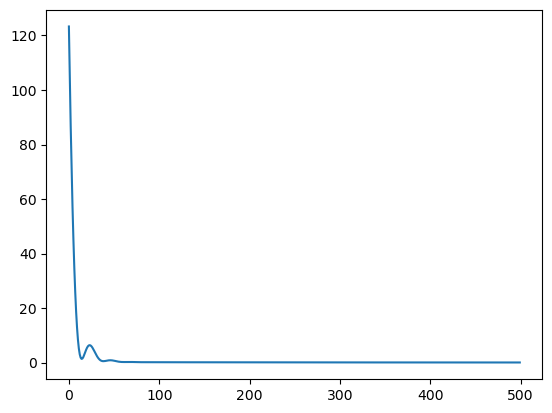

In [21]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(losses)

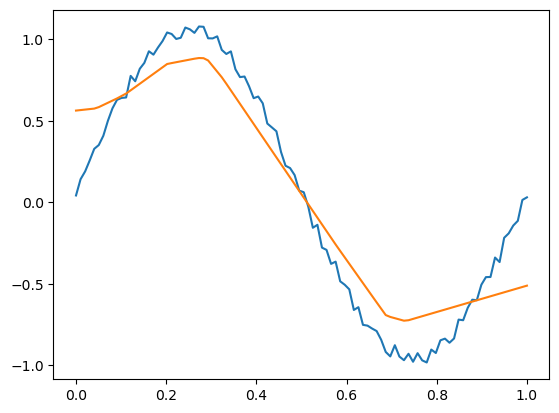

In [22]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron_2.forward(activation.forward(neuron_1.forward(X))))

## 3. Построение сетей при помощи `torch.nn`

In [23]:
import torch.nn as nn

3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [24]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

In [25]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = SineNet(3)
optimizer = optim.Adam(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = neuron.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.4977048635482788
Epoch 100 loss: 0.24417926371097565
Epoch 200 loss: 0.19336068630218506
Epoch 300 loss: 0.19187837839126587
Epoch 400 loss: 0.19008508324623108
Epoch 500 loss: 0.18748052418231964
Epoch 600 loss: 0.1833886355161667
Epoch 700 loss: 0.17650379240512848
Epoch 800 loss: 0.1637488305568695
Epoch 900 loss: 0.1395435482263565
Epoch 1000 loss: 0.10240616649389267
Epoch 1100 loss: 0.06405535340309143
Epoch 1200 loss: 0.035632237792015076
Epoch 1300 loss: 0.020097078755497932
Epoch 1400 loss: 0.013763627968728542
Epoch 1500 loss: 0.011557409539818764
Epoch 1600 loss: 0.010518385097384453
Epoch 1700 loss: 0.009737219661474228
Epoch 1800 loss: 0.009014162234961987
Epoch 1900 loss: 0.00830216147005558


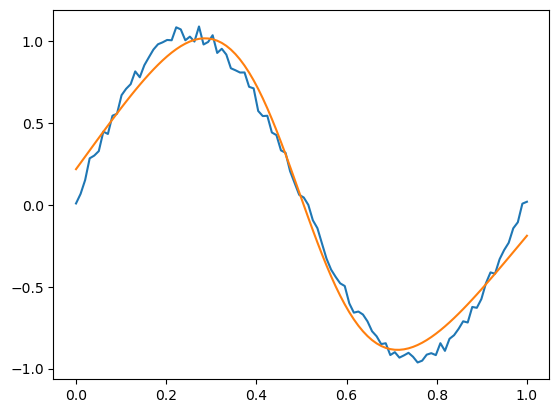

In [26]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X))

3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

In [27]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size()) 

layers = [
    torch.nn.Linear(1, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1)
]
model = torch.nn.Sequential(*layers)

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()
    
    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.7906050086021423
Epoch 100 loss: 0.39478814601898193
Epoch 200 loss: 0.2168487161397934
Epoch 300 loss: 0.19554147124290466
Epoch 400 loss: 0.19280463457107544
Epoch 500 loss: 0.18891647458076477
Epoch 600 loss: 0.1819574534893036
Epoch 700 loss: 0.1687861829996109
Epoch 800 loss: 0.14722859859466553
Epoch 900 loss: 0.11940829455852509
Epoch 1000 loss: 0.08909095078706741
Epoch 1100 loss: 0.06048576533794403
Epoch 1200 loss: 0.03974950686097145
Epoch 1300 loss: 0.028424493968486786
Epoch 1400 loss: 0.0232499148696661
Epoch 1500 loss: 0.02084169164299965
Epoch 1600 loss: 0.019388865679502487
Epoch 1700 loss: 0.018208203837275505
Epoch 1800 loss: 0.017089229077100754
Epoch 1900 loss: 0.015969062224030495


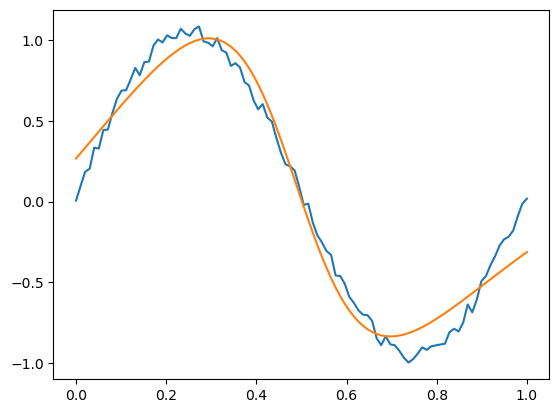

In [28]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, model(X))

3.3 Решить задачу классификации. Датасет: Breast Cancer Wisconsin
1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim` 

## 4. Datasets and dataloaders

In [29]:
from torch.utils.data import Dataset, DataLoader

4.1 Создать датасет, поставляющий данные из задачи 1.2. 

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.1 (или 3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [30]:
class SinDataset(Dataset):
    def __init__(self):
        self.X = torch.linspace(0, 1, 100).view(-1, 1)
        self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size()) 

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

4.2 Предсказание цен алмазов

4.2.1 Создайте датасет на основе файла diamonds.csv. 

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`). 

4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке. 


In [31]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader


class DiamondsDataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.data = pd.read_csv(data, index_col = [0])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        self.X = torch.FloatTensor(self.data.select_dtypes(['number']).values)
        self.y = torch.FloatTensor(self.data['price'].values)
        return self.X[idx], self.y[idx]

In [32]:
dataset = DiamondsDataset('diamonds.csv')

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [33]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_hidden_neurons, n_features)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = DiamondsNet(7, 49)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.025)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()
    
    print(f"Epoch {epoch} loss: {loss_val}")

/Users/demg/conda_env/env/lib/python3.8/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 32939328.0
Epoch 1 loss: 17219746.0
Epoch 2 loss: 16357650.0
Epoch 3 loss: 16051338.0
Epoch 4 loss: 16013814.0
Epoch 5 loss: 16009217.0
Epoch 6 loss: 16008654.0
Epoch 7 loss: 16008584.0
Epoch 8 loss: 16008576.0
Epoch 9 loss: 16008575.0
Epoch 10 loss: 16008576.0
Epoch 11 loss: 16008578.0
Epoch 12 loss: 16008576.0
Epoch 13 loss: 16008576.0
Epoch 14 loss: 16008576.0
Epoch 15 loss: 16008577.0
Epoch 16 loss: 16008577.0
Epoch 17 loss: 16008577.0
Epoch 18 loss: 16008577.0
Epoch 19 loss: 16008577.0


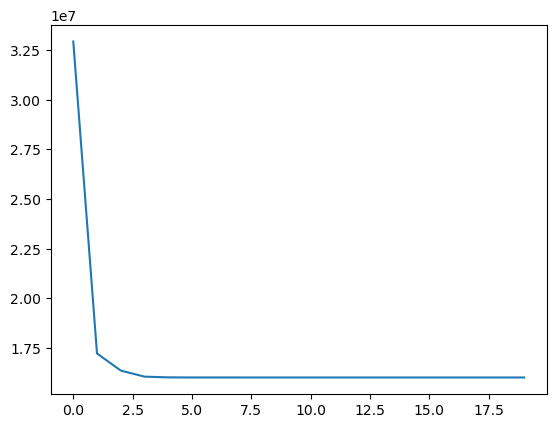

In [34]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(loss_vals)

4.3 Модифицируйте метод `__init__` датасета из 4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [35]:
class DiamondsDataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = pd.read_csv(data, index_col = [0])
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = self.data.drop('price', axis=1)
        y = self.data['price']
        sample = X.iloc[idx], y.iloc[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

In [36]:
class DropColsTransform:
    def __init__(self, drop):
        self.drop = drop
  
    def __call__(self, sample):
        X, y = sample
        X = X.drop(X.index[self.drop], axis=0)
        return X, y

In [37]:
class ToTensorTransform:
    def __call__(self, sample):
        X, y = sample
        X = torch.FloatTensor(X.astype('float64').values)
        y = torch.FloatTensor([y])
        return X, y

In [38]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('diamonds.csv', transform=transforms.Compose([drop, to_tensor]))

In [39]:

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [40]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_hidden_neurons), 
            torch.nn.Sigmoid(), 
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons*2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons*2,1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

neuron = DiamondsNet(16, 6)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(35):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()

    print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 31790668.0
Epoch 1 loss: 25573476.0
Epoch 2 loss: 18572910.0
Epoch 3 loss: 16005635.0
Epoch 4 loss: 15319158.0
Epoch 5 loss: 15133533.0
Epoch 6 loss: 15083339.0
Epoch 7 loss: 15069768.0
Epoch 8 loss: 15066097.0
Epoch 9 loss: 15065107.0
Epoch 10 loss: 15064838.0
Epoch 11 loss: 15064764.0
Epoch 12 loss: 15064746.0
Epoch 13 loss: 15064739.0
Epoch 14 loss: 15064736.0
Epoch 15 loss: 15064737.0
Epoch 16 loss: 15064738.0
Epoch 17 loss: 15064736.0
Epoch 18 loss: 15064736.0
Epoch 19 loss: 15064737.0
Epoch 20 loss: 15064736.0
Epoch 21 loss: 15064737.0
Epoch 22 loss: 15064737.0
Epoch 23 loss: 15064736.0
Epoch 24 loss: 15064736.0
Epoch 25 loss: 15064736.0
Epoch 26 loss: 15064737.0
Epoch 27 loss: 15064737.0
Epoch 28 loss: 15064736.0
Epoch 29 loss: 15064736.0
Epoch 30 loss: 15064736.0
Epoch 31 loss: 15064736.0
Epoch 32 loss: 15064736.0
Epoch 33 loss: 15064736.0
Epoch 34 loss: 15064736.0


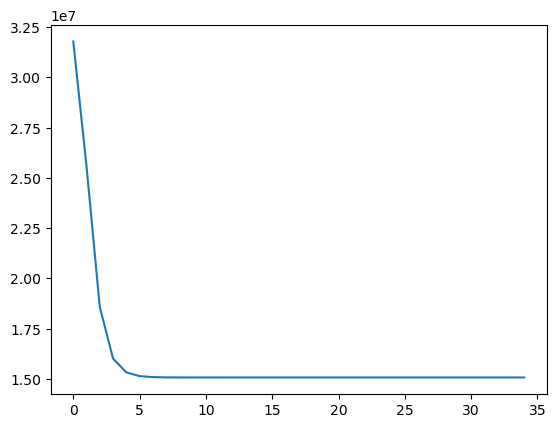

In [41]:
with torch.no_grad():
    plt.plot(loss_vals)